In [3]:
import numpy as np
from statsmodels.tsa.stattools import adfuller as ADF

In [4]:
a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/Z_Healthy/c_Z'+'001'+'.txt')
ADF(a)

(-8.4157477321009253,
 2.0460285933289973e-13,
 30,
 4066,
 {'1%': -3.4319593047679291,
  '5%': -2.8622511027398345,
  '10%': -2.5671485270169598},
 -1853.5762791929146)

In [9]:
a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/F_Interictal/F'+'034'+'.txt')
ADF(a)

(-10.180820534522455,
 6.7023341163255813e-18,
 29,
 4067,
 {'1%': -3.4319589088195097,
  '5%': -2.8622509278295882,
  '10%': -2.5671484339024078},
 22627.253249284855)

In [2]:
from statsmodels.tsa.arima_model import ARMA
def proper_model(data_ts, maxLag): 
    init_bic = float("inf")
    init_p = 0
    init_properModel = None
    for p in np.arange(maxLag + 1):
        model = ARMA(data_ts, order=(p, 0))
        try:
            results_ARMA = model.fit(disp=-1, method='css')
        except:
            continue
        bic = results_ARMA.bic
        if bic < init_bic:
            init_p = p
            init_properModel = results_ARMA
            init_bic = bic
    if(init_p<maxLag):
        para = np.concatenate([init_properModel.arparams, [0]*(maxLag-init_p)])
    else:
        para = init_properModel.arparams
    return para

In [10]:
from scipy import signal

fs_Hz = 173.61
# create the 50 Hz filter
bp_stop_Hz = np.array([49, 51.0])
b_sig, a_sig = signal.butter(2,bp_stop_Hz/(fs_Hz / 2.0), 'bandstop')
# compute the frequency response
#w, h = signal.freqz(b,a,1000)
#f = w * fs_Hz / (2*np.pi)             # convert from rad/sample to Hz
#y_filtered = signal.lfilter(b_sig, a_sig, y)
#return y_filtered

In [11]:
b_sig

array([ 0.95010463,  0.89942691,  2.11307233,  0.89942691,  0.95010463])

In [12]:
a_2 = signal.lfilter(b_sig, a_sig, a)

C:\Users\Resurgam\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Response')

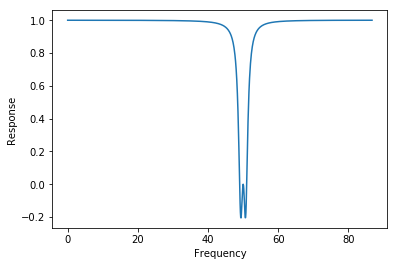

In [21]:
w, h = signal.freqz(b_sig,a_sig,1000)
f = w * fs_Hz / (2*np.pi)             # convert from rad/sample to Hz

plt.plot(f,h)
plt.xlabel('Frequency')
plt.ylabel('Response')

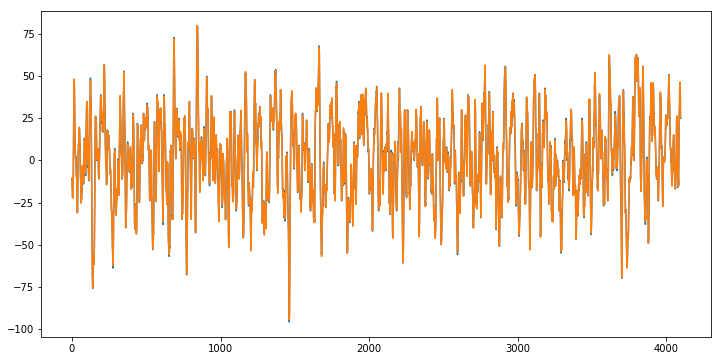

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
plt.plot(a)
plt.plot(a_2)

In [4]:
import random
random.seed(0)
test_idx = random.sample(range(1,101), 20)
train_idx = list(set(range(1,101)) - set(test_idx))

In [5]:
len(train_idx)

80

In [12]:
#small sample
t = str(train_idx[0]).zfill(3)
a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/Z_Healthy/c_Z'+t+'.txt')
print(a[:20])
a = signal.lfilter(b_sig, a_sig, a)

[ 0.38108  0.69961  1.1145   1.4349   2.2032   2.366    2.5292   2.5005
  2.1186   1.382    1.062    1.16     1.0969   1.2275   1.1643   0.90669
  0.19452 -0.61673 -1.2349  -1.4641 ]


In [13]:
a[:20]

array([ 0.36206587,  0.67346707,  1.10797721,  1.42601687,  2.15921669,
        2.34825352,  2.56275819,  2.49520925,  2.109846  ,  1.44673826,
        1.09304159,  1.0956074 ,  1.09540719,  1.28549093,  1.13579738,
        0.8812784 ,  0.28122238, -0.55689359, -1.27271512, -1.46114141])

In [15]:
Maxorder = 40
para = proper_model(a, Maxorder)

NameError: name 'dat_health' is not defined

In [18]:
Maxorder = 40
dat_health = np.zeros([160, Maxorder])
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/Z_Healthy/c_Z'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_health[i,:]=para
print("*")
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/O_Healthy/c_O'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_health[i+80,:]=para
print("*")
dat_inter = np.zeros([160, Maxorder])
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/F_Interictal/c_F'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_inter[i,:]=para
print("*")
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/N_Interictal/c_N'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_inter[i+80,:]=para
print("*")
dat_ict = np.zeros([80, Maxorder])
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/S_Ictal/c_S'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_ict[i,:]=para

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
*
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
*
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
*
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
*
0


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/c_S001.txt'

In [19]:
dat_ict = np.zeros([80, Maxorder])
for i in range(80):
    print(i)
    t = str(train_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/S_Ictal/c_S'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_ict[i,:]=para

0
1


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2
3
4
5
6
7
8
9
10
11


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


12
13
14
15
16
17
18
19
20
21
22
23
24
25


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [22]:
import pickle as pkl
pkl.dump(dat_health, open("dat_health.pkl", "wb"))
pkl.dump(dat_inter, open("dat_inter.pkl", "wb"))
pkl.dump(dat_ict, open("dat_ict.pkl", "wb"))


In [20]:
Maxorder = 40
dat_health_test = np.zeros([40, Maxorder])
for i in range(20):
    print(i)
    t = str(test_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/Z_Healthy/c_Z'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_health_test[i,:]=para
print("*")
for i in range(20):
    print(i)
    t = str(test_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/O_Healthy/c_O'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_health_test[i+20,:]=para
print("*")
dat_inter_test = np.zeros([40, Maxorder])
for i in range(20):
    print(i)
    t = str(test_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/F_Interictal/c_F'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_inter_test[i,:]=para
print("*")
for i in range(20):
    print(i)
    t = str(test_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/N_Interictal/c_N'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_inter_test[i+10,:]=para
print("*")
dat_ict_test = np.zeros([20, Maxorder])
for i in range(20):
    print(i)
    t = str(test_idx[i]).zfill(3)
    a = np.loadtxt('C:/Users/Resurgam/Desktop/TimeSeries/GPPAD/gppadv1/Data/S_Ictal/c_S'+t+'.txt')
    a = signal.lfilter(b_sig, a_sig, a)
    para = proper_model(a, Maxorder)
    dat_ict_test[i,:]=para

C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


*


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


*
*
*


C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Resurgam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
pkl.dump(dat_health_test, open("dat_health_test.pkl", "wb"))
pkl.dump(dat_inter_test, open("dat_inter_test.pkl", "wb"))
pkl.dump(dat_ict_test, open("dat_ict_test.pkl", "wb"))


In [24]:
X = np.concatenate([dat_health,dat_inter,dat_ict])
y = np.concatenate([[0]*160,[1]*160,[2]*80])
X_test = np.concatenate([dat_health_test,dat_inter_test,dat_ict_test])
y_test = np.concatenate([[0]*40,[1]*40,[2]*20])

In [25]:
np.savetxt("train.txt",X)
np.savetxt("test.txt",X_test)

In [32]:
#5-fold cv
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits= 5, random_state=0)
acc =[]

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf = MLPClassifier(hidden_layer_sizes=(32, ), max_iter=5000 )
    clf.fit(X_train, y_train)
    pred = clf.predict(X_val)
    print(len(pred[y_val==pred])/len(y_val))
    acc.append(len(pred[y_val==pred])/len(y_val))

0.85
0.8625
0.8625
0.925
0.8875


In [33]:
print(np.array(acc).mean())

0.8775


In [52]:
#perform some parameter tuning
#learning_rate
#warm_start
#alpha = 1e-5
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
#hidden_layer_sizes 

from sklearn.model_selection import GridSearchCV
param_dict = {
    "hidden_layer_sizes": [(20, ), (30, ), (60, ), (90, ), (120, ), (150, ), (180, )],
    "warm_start": [True, False],
    "activation": ["logistic", "relu"],
    "alpha": [1e-5, 1e-4, 1e-3]
}
kf = StratifiedKFold(n_splits= 5, random_state=0)
clf = MLPClassifier(max_iter=5000, learning_rate="adaptive")
gs = GridSearchCV(clf, param_dict, cv=kf)
gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(20,), (30,), (60,), (90,), (120,), (150,), (180,)], 'warm_start': [True, False], 'activation': ['logistic', 'relu'], 'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
gs.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (120,),
 'warm_start': False}

In [54]:
gs.best_score_

0.89000000000000001

In [56]:
kf = StratifiedKFold(n_splits= 5, random_state=0)
acc =[]

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf = MLPClassifier(max_iter=5000, hidden_layer_sizes=(120,), learning_rate="adaptive", alpha = 0.001)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_val)
    print(len(pred[y_val==pred])/len(y_val))
    acc.append(len(pred[y_val==pred])/len(y_val))


0.8625
0.8625
0.875
0.8875
0.8875


In [58]:
np.array(acc).mean()

0.875

In [57]:
pred = clf.predict(X_test)
print(len(pred[y_test ==pred])/len(y_test))

0.89
